In [1]:
import pandas as pd
import numpy as np
import time
!pip install pandasql
import pandasql as ps
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals()) 
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA

Defaulting to user installation because normal site-packages is not writeable


In [3]:
df=pd.read_excel('ANKLESHWAR/H_Ankl_1_2_19-3_12_22-*41* (copy).xlsx',usecols={'CENTRAL POLLUTION CONTROL BOARD','Unnamed: 2'}) #read excel spacfioc colume and import
N=1+15
df.drop(index=df.index[:N], axis=0, inplace=True) # Drop row through N    (axis = o)=row
d = df.rename(columns={'CENTRAL POLLUTION CONTROL BOARD':'Date','Unnamed: 2':'PM'}) # Colume ReName 
d['DD'] = d['Date'].str.split('-').str[0]   
d['MM'] = d['Date'].str.split('-').str[1]
d['YYYY'] = d['Date'].str.split('-').str[2]
d['YYYY'] = d['YYYY'].map(lambda x: str(x)[:-6])
d['Hour'] = d['Date'].str.split(' ').str[1]
d['DATE']=d['YYYY']+'-'+d['MM']+'-'+d['DD']+' '+d['Hour']
d['DATE']= pd.to_datetime(d['DATE'])
d=d.drop(['Date','YYYY','DD','MM','Hour'],axis=1)
d['row_num']=np.arange(len(d))
q="""SELECT row_num from d where PM is null limit 1"""    #sql query ########################Changes####################
df1=ps.sqldf(q, locals())
a=df1.values.flatten()
b=(a[0])
b
d=d.iloc[:b,:] 
d['PM']=d['PM'].replace(0,'None')
#q="""SELECT row_num from d where PM is null limit 1"""    #sql query
q="""SELECT row_num from d where PM <>'None' limit 1"""    #sql query ########################Changes####################
df1=ps.sqldf(q, locals())
a=df1.values.flatten()
b=(a[0])
b
q="""SELECT row_num from d where PM <>'None' order by row_num desc limit 1""" 
dl2=ps.sqldf(q, locals())
a=dl2.values.flatten()
e=(a[0])
e
df=d.iloc[b:e,:] 
df.PM[df.PM == 'None'] = 0
df.replace(0, np.NaN,inplace=True)

/tmp/ipykernel_5338/1083768975.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.PM[df.PM == 'None'] = 0
/tmp/ipykernel_5338/1083768975.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace(0, np.NaN,inplace=True)


In [4]:
#df.replace('None', np.NaN,inplace=True)
#df[df['PM']== 'None']['PM'] = 0

In [5]:
df.isna().sum()
df.isnull().sum()
df

,PM,DATE,row_num
106,70.52,2019-02-04 18:00:00,90
107,61.39,2019-02-04 19:00:00,91
108,59.94,2019-02-04 20:00:00,92
109,76.44,2019-02-04 21:00:00,93
110,98.54,2019-02-04 22:00:00,94
...,...,...,...
33636,120.98,2022-12-02 20:00:00,33620
33637,115.37,2022-12-02 21:00:00,33621
33638,104.06,2022-12-02 22:00:00,33622
33639,110.59,2022-12-02 23:00:00,33623


In [9]:
'''
q="""SELECT PM, DATE from df where  row_num < 11869 """ 
dl2=ps.sqldf(q, locals())

q="""SELECT PM, DATE from df where  row_num > 12979 """ 
dl3=ps.sqldf(q, locals())
dl3

q="""SELECT PM, DATE from df where  row_num > 11869 and row_num<12979""" 
dl4=ps.sqldf(q, locals());
''';

In [10]:
#df['ffill']=df['PM'].fillna(method='ffill')
#df['bfill']=df['PM'].fillna(method='bfill')

In [11]:
#df['final']=((df['ffill']+df['bfill'])/2)

In [12]:
#df.to_csv('Final.csv')

In [13]:
#df[['PM','final']].plot()

In [14]:
#y_pred=df['final'].tolist()
#y_true=df['final'].tolist()
#mean_squared_error(y_true, y_pred)**0.5

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:

def divideData(df):
  df.dropna()
  a=len(df)
  #print(a)
  form=['X_train2', 'X_train3', 'X_train4', 'X_train5', 'X_train6', 'X_train7', 'X_train8', 'X_train9', 'X_train10']
  Testing=[ 'X_test2', 'X_test3', 'X_test4', 'X_test5', 'X_test6', 'X_test7', 'X_test8', 'X_test9', 'X_test10']
  #list_of_df = list()
  x=int(0.1*a)
  #print(x)
  j=1
  X_train1 = df.iloc[0:x,0:1]
  #print(X_train1)
  X_test1=X_train1.iloc[:,0:1].copy()
  #X_train1.loc[X_train1.index[:], 0:1] = np.nan
  X_train1.iloc[:, 0:1] = np.nan
  '''
  for (a, b) in zip(form, Testing):
    b=pd.DataFrame()
    b=a.iloc[:,0:1].copy()
  '''

  #print("Training")
  #print(X_train1)
  DF = pd.concat([X_train1])
  for i in form:
    t=x*j
    s=((j+1)*x)
    #print(t)
    #print(s)
    i=df.iloc[t:s,0:1] ######  Creating Chuncks of Dataframe to be concatenated with DF 
    for b in Testing:
      b=i ######  Creating 9 different test data sets stored in X_test2 to X_test9
    j += 1
    DF=pd.concat([DF, i]) ##### Combination of dataframe with First DataFrame as NaN
    #print(DF)
    #a.dropna()
  
  
  
  return DF, X_test1

DF, X_test1 =divideData(df)
DF
X_test1

,PM
106,70.52
107,61.39
108,59.94
109,76.44
110,98.54
...,...
3454,31.79
3455,28.46
3456,35.99
3457,36.10


In [17]:
# Training data

X = df.loc[:, ['PM','DATE']]  # features
X_train1 = df.loc[0:1110, ['PM','DATE']]
X_train2 = df.loc[1110:2220, ['PM','DATE']]
X_train3 = df.loc[2220:3330, ['PM','DATE']]
X_train4 = df.loc[3330:4440, ['PM','DATE']]
X_train5 = df.loc[4440:5550, ['PM','DATE']]
X_train6 = df.loc[5550:6660, ['PM','DATE']]
X_train7 = df.loc[6660:7770, ['PM','DATE']]
X_train8 = df.loc[7770:8880, ['PM','DATE']]
X_train9 = df.loc[8880:9990, ['PM','DATE']]
X_test1=X_train1.copy()
X_train2.dropna()
print(X_train2.count())
X_train3.dropna()
print(X_train3.count())
X_train4.dropna()
print(X_train4.count())
X_train5.dropna()
print(X_train5.count())
X_train6.dropna()
print(X_train6.count())
X_train7.dropna()
print(X_train7.count())
X_train8.dropna()
print(X_train8.count())
X_train9.dropna()
print(X_train9.count())
X_train1.loc[X_train1.index[:], 'PM'] = np.nan
DF = pd.concat([X_train1, X_train2, X_train3, X_train4, X_train5, X_train6, X_train7, X_train8, X_train9])

#y = df.loc[11779:12890, 'PM']  # target
#print(X)
#print(y)
#X.dropna()
#y.dropna()
# Train the model
#model = LinearRegression()
#model.fit(X, y)

# Store the fitted values as a time series with the same time index as
# the training data
#y_pred = pd.Series(model.predict(X), index=X.index)

PM      1067
DATE    1111
dtype: int64
PM      1057
DATE    1111
dtype: int64
PM       997
DATE    1111
dtype: int64
PM       953
DATE    1111
dtype: int64
PM       784
DATE    1111
dtype: int64
PM       984
DATE    1111
dtype: int64
PM       889
DATE    1111
dtype: int64
PM      1082
DATE    1111
dtype: int64


In [18]:
#DF['Mode']=DF['PM'].fillna(DF['PM'].mode()[0])
#DF['ffill']=DF['PM'].fillna(method='ffill')
#DF['bfill']=DF['PM'].fillna(method='bfill')
#DF['bffill']=DF['PM'].fillna(((DF['ffill']+DF['bfill'])/2))
interpolations=['linear', 'nearest']
for intp in interpolations:
    DF[intp]=DF['PM'].interpolate(method=intp)

In [19]:
estimators=[('extra_trees', ExtraTreesRegressor(n_estimators=10)), ('bagging', BaggingRegressor(n_estimators=10)),('elastic_net', ElasticNet()),('linear_regression', LinearRegression()), ('knn',KNeighborsRegressor(n_neighbors=3)) ]
PM_vals=DF.iloc[:,0:1].values
for e_name, e in estimators:
    est=IterativeImputer(random_state=15, estimator=e).fit(PM_vals)
    DF[e_name]=est.transform(PM_vals)[:,0]

NameError: name 'ExtraTreesRegressor' is not defined

In [20]:
#X_test1['PM']=X_test1['PM'].fillna(X_test1['PM'].mode()[0])
#X_test1.isnull().sum()

#X_test1['PM']=X_test1['PM'].fillna(method='ffill')
for intp in interpolations:
    X_test1[intp]=X_test1['PM'].interpolate(method=intp)
X_test1.isnull().sum()

PM         3
DATE       0
linear     0
nearest    0
dtype: int64

In [21]:
X_test1['PM']=X_test1['PM'].fillna(X_test1['PM'].mean())

In [22]:
PM_vals=X_test1.iloc[:,0:1].values
for e_name, e in estimators:
    est=IterativeImputer(random_state=15, estimator=e).fit(PM_vals)
    X_test1[e_name]=est.transform(PM_vals)[:,0]

NameError: name 'estimators' is not defined

In [ ]:


y_true=X_test1.loc[0:1105,['PM']].values.tolist()
y_pred=DF.loc[0:1105, ['knn']].values.tolist()
DF.isnull().sum()
print(len(y_pred), len(y_true))
mean_squared_error(y_true, y_pred)**0.5

1000 1000


32.009530551368336

In [ ]:
interpolations=['linear','quadratic','nearest','cubic']
for intp in interpolations:
    DF[intp]=DF['PM'].interpolate(method=intp)

In [ ]:
df1_train['spline1']=df1_train['PM'].interpolate(method='spline', order=1)

In [ ]:
#df1_train[['PM','forecast2']].plot()

In [ ]:
df1_train.to_csv('df1_train.csv')


In [ ]:
from sklearn.experimental import enable_iterative_imputer

In [ ]:
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor, BaggingRegressor
from sklearn.linear_model import ElasticNet, LinearRegression

In [ ]:
from sklearn.neighbors import *

In [ ]:
estimators=[('extra_trees', ExtraTreesRegressor(n_estimators=10)), ('bagging', BaggingRegressor(n_estimators=10)),('elastic_net', ElasticNet()),('linear_regression ', LinearRegression()), ('knn',KNeighborsRegressor(n_neighbors=3)) ]

In [ ]:
PM_vals=df1_train.iloc[:,0:1].values

In [ ]:
PM_vals

array([[ 70.52],
       [ 61.39],
       [ 59.94],
       ...,
       [104.06],
       [110.59],
       [122.87]])

In [ ]:
for e_name, e in estimators:
    est=IterativeImputer(random_state=15, estimator=e).fit(PM_vals)
    df1_train[e_name]=est.transform(PM_vals)[:,0]

In [ ]:
df1_train

,PM,DATE,Mode2,linear,quadratic,nearest,cubic,spline1,extra_trees,bagging,elastic_net,linear_regression,knn
106,70.52,2019-02-04 18:00:00,70.52,70.52,70.52,70.52,70.52,70.52,70.52,70.52,70.52,70.52,70.52
107,61.39,2019-02-04 19:00:00,61.39,61.39,61.39,61.39,61.39,61.39,61.39,61.39,61.39,61.39,61.39
108,59.94,2019-02-04 20:00:00,59.94,59.94,59.94,59.94,59.94,59.94,59.94,59.94,59.94,59.94,59.94
109,76.44,2019-02-04 21:00:00,76.44,76.44,76.44,76.44,76.44,76.44,76.44,76.44,76.44,76.44,76.44
110,98.54,2019-02-04 22:00:00,98.54,98.54,98.54,98.54,98.54,98.54,98.54,98.54,98.54,98.54,98.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33636,120.98,2022-12-02 20:00:00,120.98,120.98,120.98,120.98,120.98,120.98,120.98,120.98,120.98,120.98,120.98
33637,115.37,2022-12-02 21:00:00,115.37,115.37,115.37,115.37,115.37,115.37,115.37,115.37,115.37,115.37,115.37
33638,104.06,2022-12-02 22:00:00,104.06,104.06,104.06,104.06,104.06,104.06,104.06,104.06,104.06,104.06,104.06
33639,110.59,2022-12-02 23:00:00,110.59,110.59,110.59,110.59,110.59,110.59,110.59,110.59,110.59,110.59,110.59


In [ ]:
df1_train.set_index('DATE')

,PM,Mode2,linear,quadratic,nearest,cubic,spline1,extra_trees,bagging,elastic_net,linear_regression,knn
DATE,,,,,,,,,,,,
2019-02-04 18:00:00,70.52,70.52,70.52,70.52,70.52,70.52,70.52,70.52,70.52,70.52,70.52,70.52
2019-02-04 19:00:00,61.39,61.39,61.39,61.39,61.39,61.39,61.39,61.39,61.39,61.39,61.39,61.39
2019-02-04 20:00:00,59.94,59.94,59.94,59.94,59.94,59.94,59.94,59.94,59.94,59.94,59.94,59.94
2019-02-04 21:00:00,76.44,76.44,76.44,76.44,76.44,76.44,76.44,76.44,76.44,76.44,76.44,76.44
2019-02-04 22:00:00,98.54,98.54,98.54,98.54,98.54,98.54,98.54,98.54,98.54,98.54,98.54,98.54
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-02 20:00:00,120.98,120.98,120.98,120.98,120.98,120.98,120.98,120.98,120.98,120.98,120.98,120.98
2022-12-02 21:00:00,115.37,115.37,115.37,115.37,115.37,115.37,115.37,115.37,115.37,115.37,115.37,115.37
2022-12-02 22:00:00,104.06,104.06,104.06,104.06,104.06,104.06,104.06,104.06,104.06,104.06,104.06,104.06


In [ ]:
a=df1_train['PM'].mode()
a
df1_train['Median'] = df1_train['PM'].fillna(df1_train['PM'].median())

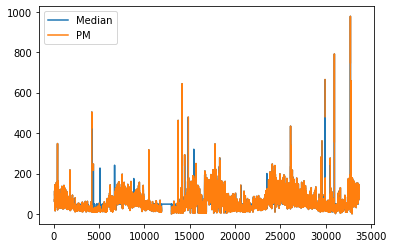

In [ ]:
df1_train[['Median', 'PM']].plot()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(df1_train['PM'], order=(24,0,1))

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


In [ ]:
model_fit=model.fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                     PM   No. Observations:                33535
Model:                ARIMA(24, 0, 1)   Log Likelihood             -117848.122
Date:                Wed, 07 Dec 2022   AIC                         235750.244
Time:                        17:12:08   BIC                         235977.593
Sample:                             0   HQIC                        235822.807
                              - 33535                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.4186      3.978     14.686      0.000      50.622      66.215
ar.L1          0.0589      0.011      5.449      0.000       0.038       0.080
ar.L2          0.5946      0.011     54.227      0.000       0.573       0.616
ar.L3         -0.0999      0.005    -22.197      0.000      -0.109      -0.091
ar.L4          0.0870      0.004     22.233      0.000       0.079       0.095
ar.L5         -0.0615      0.003    -17.608      0.000      -0.068      -0.055
ar.L6          0.0494      0.003     14.230      0.000       0.043       0.056
ar.L7         -0.0119      0.005     -2.351      0.019      -0.022      -0.002
ar.L8         -0.0035      0.006     -0.594      0.553      -0.015       0.008
ar.L9          0.0035      0.006      0.542      0.588      -0.009       0.016
ar.L10         0.0122      0.006      2.028      0.043       0.000       0.024
ar.L11         0.0179      0.005      3.574      0.000       0.008       0.028
ar.L12         0.0622      0.005     13.103      0.000       0.053       0.072
ar.L13         0.0038      0.006      0.650      0.516      -0.008       0.015
ar.L14        -0.0290      0.005     -5.596      0.000      -0.039      -0.019
ar.L15        -0.0077      0.005     -1.575      0.115      -0.017       0.002
ar.L16         0.0008      0.005      0.170      0.865      -0.008       0.010
ar.L17         0.0041      0.005      0.755      0.450      -0.007       0.015
ar.L18         0.0148      0.007      2.256      0.024       0.002       0.028
ar.L19         0.0069      0.006      1.177      0.239      -0.005       0.018
ar.L20        -0.0105      0.006     -1.901      0.057      -0.021       0.000
ar.L21         0.0311      0.004      7.403      0.000       0.023       0.039
ar.L22         0.0484      0.004     10.929      0.000       0.040       0.057
ar.L23         0.0805      0.003     26.277      0.000       0.074       0.086
ar.L24         0.0939      0.003     32.905      0.000       0.088       0.099
ma.L1          0.9377      0.011     86.272      0.000       0.916       0.959
sigma2       237.9566      0.188   1266.739      0.000     237.588     238.325
===================================================================================
Ljung-Box (L1) (Q):                 130.21   Jarque-Bera (JB):         415890356.81
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               4.01   Skew:                             4.04
Prob(H) (two-sided):                  0.00   Kurtosis:                       548.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
df1_train['forecast2']=model_fit.predict(start=11500, end=12900, dynamic=False)

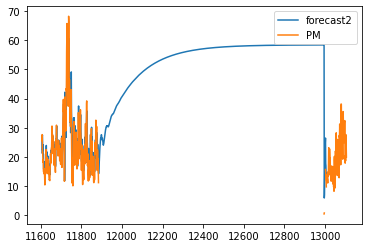

In [ ]:
df1_train[['forecast2','PM']].iloc[11500:13000,:].plot()
#df1_train[['forecast2','PM']].plot()